In [1]:
import os
import urllib

import pandas as pd

from cell_type_naming import nice_to_weirds, weird_to_nice

In [2]:
experiment_name = "website_inferred_refsample"
experiment_uri = os.path.join("gs://liulab/csx_experiments/varying_simple_parameters", experiment_name)

experiment_uri

'gs://liulab/csx_experiments/varying_simple_parameters/website_inferred_refsample'

In [3]:
!gsutil --quiet rm -r $experiment_uri

In [4]:
mixture_source = "gs://liulab/csx_example_files/Single_Cell_RNA-Seq_Melanoma_SuppFig_3b-d/mixture_melanoma_Tirosh_SuppFig_3b-d.txt"
# mixture_filename = os.path.basename(mixture_source)
mixture_filename = "mymixture.txt"
mixture_target = os.path.join(experiment_uri, "in", mixture_filename)

!gsutil cp $mixture_source $mixture_target

Copying gs://liulab/csx_example_files/Single_Cell_RNA-Seq_Melanoma_SuppFig_3b-d/mixture_melanoma_Tirosh_SuppFig_3b-d.txt [Content-Type=text/plain]...
/ [1 files][  6.0 MiB/  6.0 MiB]                                                
Operation completed over 1 objects/6.0 MiB.                                      


In [5]:
%%bash

# refsample
gsutil cp \
    gs://liulab/downloaded_manually/refsamples_from_csx_website/CIBERSORTx_Job4_myrefsample_inferred_refsample.txt \
    gs://liulab/csx_experiments/varying_simple_parameters/website_inferred_refsample/in/Job4_inferred_refsample.txt

# phenoclasses
gsutil cp \
    gs://liulab/downloaded_manually/refsamples_from_csx_website/CIBERSORTx_Job4_myrefsample_inferred_phenoclasses.txt \
    gs://liulab/csx_experiments/varying_simple_parameters/website_inferred_refsample/in/Job4_inferred_phenoclasses.txt


Copying gs://liulab/downloaded_manually/refsamples_from_csx_website/CIBERSORTx_Job4_myrefsample_inferred_refsample.txt [Content-Type=text/plain]...
/ [1 files][  4.9 MiB/  4.9 MiB]                                                
Operation completed over 1 objects/4.9 MiB.                                      
Copying gs://liulab/downloaded_manually/refsamples_from_csx_website/CIBERSORTx_Job4_myrefsample_inferred_phenoclasses.txt [Content-Type=text/plain]...
/ [1 files][  725.0 B/  725.0 B]                                                
Operation completed over 1 objects/725.0 B.                                      


In [6]:
experiment_path = os.path.abspath("./stuff")

In [7]:
!rm -r $experiment_path
!mkdir -p $experiment_path

In [8]:
!gsutil rsync -r $experiment_uri $experiment_path

Building synchronization state...
Starting synchronization...
Copying gs://liulab/csx_experiments/varying_simple_parameters/website_inferred_refsample/in/Job4_inferred_phenoclasses.txt...
Copying gs://liulab/csx_experiments/varying_simple_parameters/website_inferred_refsample/in/Job4_inferred_refsample.txt...
Copying gs://liulab/csx_experiments/varying_simple_parameters/website_inferred_refsample/in/mymixture.txt...
/ [3 files][ 10.9 MiB/ 10.9 MiB]                                                
Operation completed over 3 objects/10.9 MiB.                                     


In [9]:
!tree -h $experiment_path

/home/jupyter/deconv/experiments/stuff
└── [4.0K]  in
    ├── [ 725]  Job4_inferred_phenoclasses.txt
    ├── [4.9M]  Job4_inferred_refsample.txt
    └── [6.0M]  mymixture.txt

1 directory, 3 files


In [10]:
command = f'''docker run \
    --rm \
    -v {experiment_path}/in:/src/data \
    -v {experiment_path}:/src/outdir \
    --user "$(id -u):$(id -g)" \
    cibersortx/fractions:latest \
    --username lyronctk@stanford.edu \
    --token dfeba2c8b9d61daebee5fa87026b8e56 \
    --single_cell FALSE \
    --refsample Job4_inferred_refsample.txt \
    --phenoclasses Job4_inferred_phenoclasses.txt \
    --mixture {mixture_filename} \
    --verbose TRUE
'''.replace("    ", " \\\n    ")
print(command)

docker run \
     --rm \
     -v /home/jupyter/deconv/experiments/stuff/in:/src/data \
     -v /home/jupyter/deconv/experiments/stuff:/src/outdir \
     --user "$(id -u):$(id -g)" \
     cibersortx/fractions:latest \
     --username lyronctk@stanford.edu \
     --token dfeba2c8b9d61daebee5fa87026b8e56 \
     --single_cell FALSE \
     --refsample Job4_inferred_refsample.txt \
     --phenoclasses Job4_inferred_phenoclasses.txt \
     --mixture mymixture.txt \
     --verbose TRUE



In [11]:
!{command}

>Running CIBERSORTxFractions...
>[Options] username: lyronctk@stanford.edu
>[Options] token: dfeba2c8b9d61daebee5fa87026b8e56
>[Options] single_cell: FALSE
>[Options] refsample: Job4_inferred_refsample.txt
>[Options] phenoclasses: Job4_inferred_phenoclasses.txt
>[Options] mixture: mymixture.txt
>[Options] verbose: TRUE
>==========Signature Matrix Settings============
>Pure samples file: /src/data/Job4_inferred_refsample.txt
>Phenotype classes file: /src/data/Job4_inferred_phenoclasses.txt
>Quantile normalization of input samples is disabled
>===============================================
>C++14
>Loaded 40 columns and 23684 rows
>=============Make Signature Matrix=============
>Maximum condition number (kappa):999
>71036 DEG expressed across 8 samples were identified
>Group size: 50, Kappa: 9.44702958017558
>Best kappa: 9.44702958017558 
>SVD UpperRightDiag: 20843.6
>SVD LowerRightDiag: 2206.37
>=============CIBERSORTx Settings===============
>Mixture file: /src/data/mymixture.txt
>Sig

In [17]:
!tree -h $experiment_path

/home/jupyter/deconv/experiments/stuff
├── [ 25K]  CIBERSORTx_Job4_inferred_phenoclasses.CIBERSORTx_Job4_inferred_refsample.bm.K999.pdf
├── [ 59K]  CIBERSORTx_Job4_inferred_phenoclasses.CIBERSORTx_Job4_inferred_refsample.bm.K999.txt
├── [4.3K]  CIBERSORTx_Results.txt
├── [3.8M]  CIBERSORTx_cell_type_sourceGEP.txt
└── [4.0K]  in
    ├── [ 725]  Job4_inferred_phenoclasses.txt
    ├── [4.9M]  Job4_inferred_refsample.txt
    └── [6.0M]  mymixture.txt

1 directory, 7 files


In [18]:
!gsutil rsync -r $experiment_path $experiment_uri

Building synchronization state...
Starting synchronization...
Copying file:///home/jupyter/deconv/experiments/stuff/CIBERSORTx_Job4_inferred_phenoclasses.CIBERSORTx_Job4_inferred_refsample.bm.K999.pdf [Content-Type=application/pdf]...
Copying file:///home/jupyter/deconv/experiments/stuff/CIBERSORTx_Job4_inferred_phenoclasses.CIBERSORTx_Job4_inferred_refsample.bm.K999.txt [Content-Type=text/plain]...
Copying file:///home/jupyter/deconv/experiments/stuff/CIBERSORTx_Results.txt [Content-Type=text/plain]...
Copying file:///home/jupyter/deconv/experiments/stuff/CIBERSORTx_cell_type_sourceGEP.txt [Content-Type=text/plain]...
- [4 files][  3.9 MiB/  3.9 MiB]                                                
==> NOTE: You are performing a sequence of gsutil operations that may
run significantly faster if you instead use gsutil -m rsync ... Please
see the -m section under "gsutil help options" for further information
about when gsutil -m can be advantageous.

Copying mtime from src to dst for gs:

In [19]:
fractions_csx = pd.read_csv(
    os.path.join(experiment_uri, "CIBERSORTx_Results.txt"),
    sep="\t",
    index_col=0
).rename_axis(index="mixture_id").rename(columns=weird_to_nice).iloc[:, :-3]

fractions_csx.sample(5)

,Malignant,Endothelial,CAF,T CD8,NK,Macrophage,T CD4,B
mixture_id,,,,,,,,
60,0.039854,0.001047,0.000000,0.284340,0.107997,0.017764,0.311961,0.237037
67,0.000000,0.000000,0.000000,0.429907,0.000000,0.000000,0.545651,0.024442
58,0.000000,0.000100,0.000699,0.679460,0.051485,0.004735,0.242381,0.021139
80,0.323400,0.063724,0.055285,0.195792,0.010021,0.000000,0.320874,0.030904
81,0.209165,0.000153,0.017251,0.371966,0.006723,0.002463,0.383995,0.008284


In [21]:
signature_matrix = pd.read_csv(
    os.path.join(experiment_uri, "CIBERSORTx_Job4_inferred_phenoclasses.CIBERSORTx_Job4_inferred_refsample.bm.K999.txt"),
    sep="\t",
    index_col=0
).rename_axis(index="gene").rename(columns=weird_to_nice)

signature_matrix.sample(5)

,Malignant,Endothelial,CAF,T CD8,NK,Macrophage,T CD4,B
gene,,,,,,,,
FABP4,1.0,3327.668464,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
COL6A3,1.0,1.000000,363.391834,1.000000,1.000000,1.000000,1.000000,1.0
KLRC4,1.0,1.000000,1.000000,192.902598,78.028177,1.000000,1.000000,1.0
CFD,1.0,1.000000,1456.071120,1.000000,1.000000,365.556672,1.000000,1.0
ASB2,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,58.701862,1.0


In [22]:
fractions_truth = pd.read_csv(
    "gs://liulab/csx_example_files/groundtruth_Melanoma_Tirosh_et_al_SuppFig3b-d.txt",
    sep="\t",
    index_col=0,
).rename_axis(index="mixture_id").rename(columns=weird_to_nice)

fractions_truth.sample(5)

,Malignant,Endothelial,CAF,T CD8,NK,Macrophage,T CD4,B
mixture_id,,,,,,,,
53,0.1280,0.0880,0.0320,0.2000,0.0800,0.0960,0.3760,0.0000
65,0.0755,0.0000,0.0000,0.4717,0.0000,0.0189,0.3396,0.0943
84,0.1045,0.0075,0.0075,0.1716,0.0522,0.1866,0.2836,0.1866
75,0.0087,0.0000,0.0000,0.9417,0.0000,0.0029,0.0466,0.0000
72,0.0000,0.0000,0.0000,0.1634,0.0065,0.0000,0.6013,0.2288


In [23]:
import plotly.io
plotly.io.renderers.default = "jupyterlab+png"

import plotly.express as px
import plotly.graph_objects as go

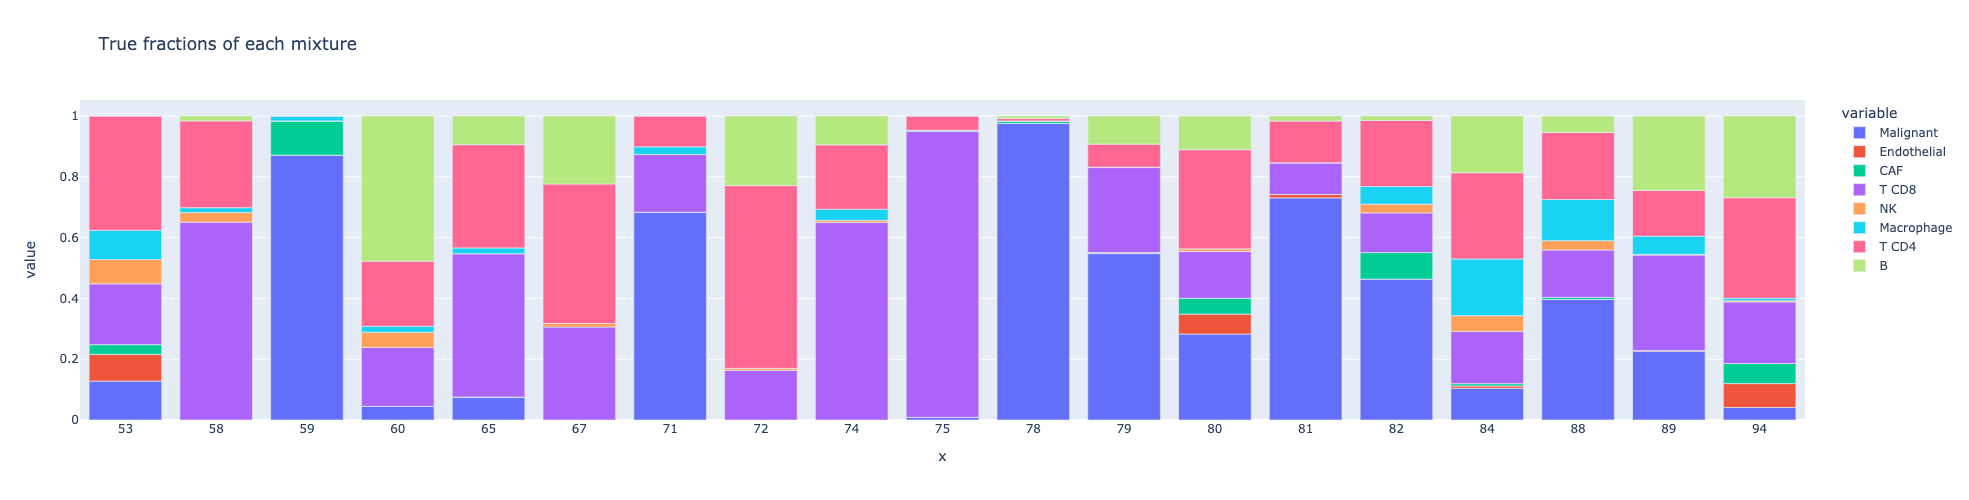

In [26]:
fig = px.bar(
    fractions_truth,  #.astype(index={"mixture_id": str}),
    x=fractions_truth.index.astype(str),
    y=fractions_truth.columns,
    title="True fractions of each mixture"
)

fig.show()

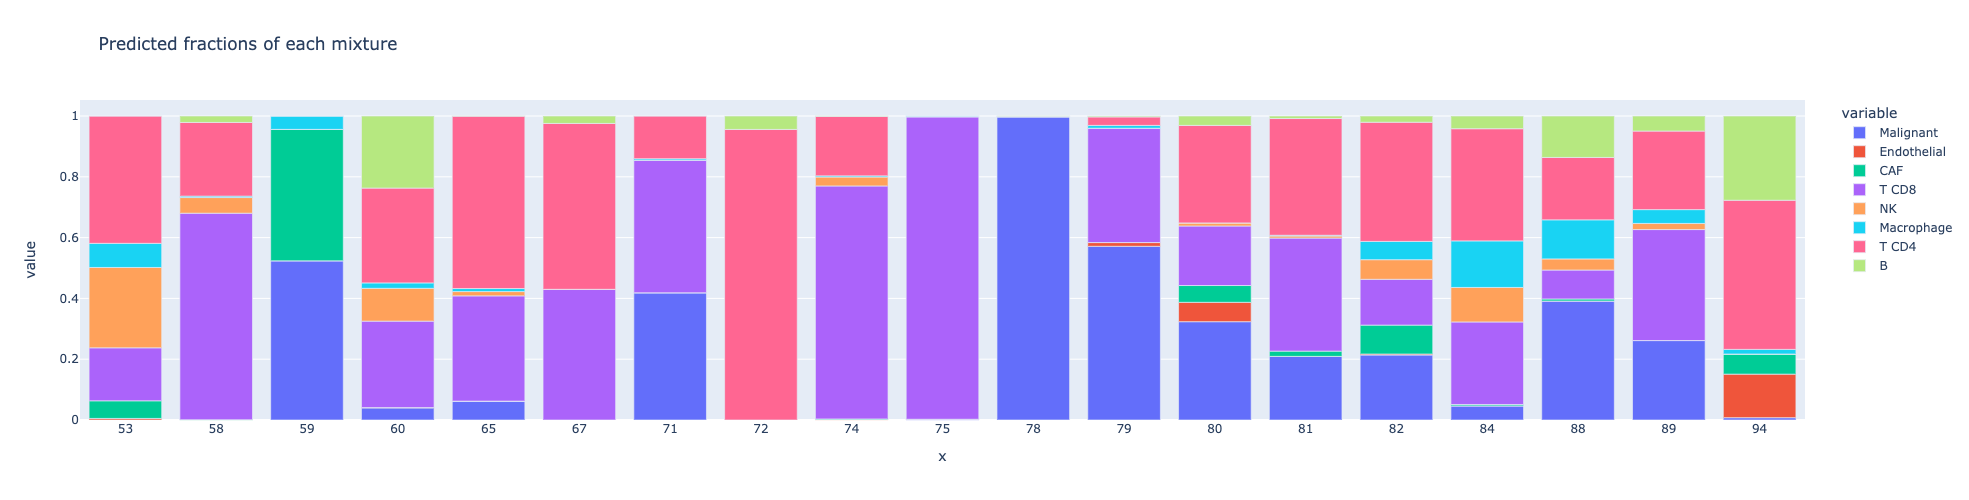

In [27]:
fig = px.bar(
    fractions_csx,  #.astype(index={"mixture_id": str}),
    x=fractions_csx.index.astype(str),
    y=fractions_csx.columns,
    title="Predicted fractions of each mixture"
)

fig.show()